# Libraries

In [1]:
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                   #to perform visualization with many color palettes, beatiful style and many statistical plots

In [2]:
df = pd.read_csv('./dataset/threads_reviews.csv');
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


# EDA

In [3]:
eda_df = df.copy()

## Check missing values

In [4]:
eda_df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

No missing values. Great!

## Summary statistics for numerical and categorical columns

In [5]:
# Summary statistics for numerical columns
numerical_summary = eda_df.describe()

# Summary statistics for categorical columns
categorical_summary = eda_df.describe(include=['O'])

numerical_summary, categorical_summary

(             rating
 count  32910.000000
 mean       3.398481
 std        1.751480
 min        1.000000
 25%        1.000000
 50%        4.000000
 75%        5.000000
 max        5.000000,
              source review_description          review_date
 count         32910              32910                32910
 unique            2              26706                31667
 top     Google Play               Good  2023-07-06 17:55:42
 freq          30270                815                    4)

Numerical Columns (Rating):     
- Count: 32,910     
- Mean (Average) Rating: 3.4        
- Standard Deviation: 1.75      
- Minimum Rating: 1     
- 25th Percentile: 1 (This means that 25% of the ratings are 1)     
- 50th Percentile (Median): 4 (This means that half of the ratings are less than or equal to 4)     
- 75th Percentile: 5 (This means that 75% of the ratings are less than or equal to 5)       
- Maximum Rating: 5         

        
        
Categorical Columns:   

1.Source:        
- Count: 32910              
- Unique Sources: 2             
- Most Common Source(top): Google Play (30270 times)        

2. Review Description:      
- Count: 32910      
- Unique review description: 26706      
- Most common review description: "Good" (815 times)        

3. Review Date      
- Count: 32910      
- Unique dates: 31667       
- Most frequent date: 2023-07-06 17:55:42 (occured 4 times)     


## Distributions of ratings

To get a clearer picture of how users rated the app     

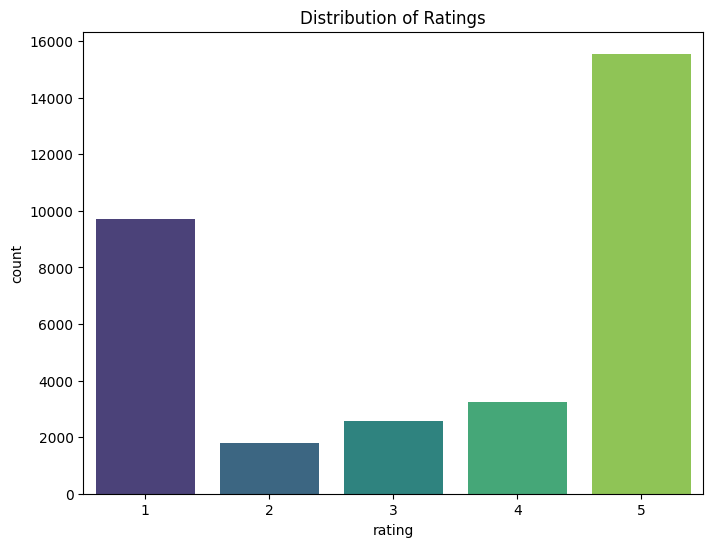

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=eda_df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

The bar chart shows the distribution of ratings in the dataset. We can see that the most common ratings are 1 and 5, suggesting a polarized user sentiment towards the app. Ratings 2, 3, and 4 have significantly fewer counts, indicating that users are more likely to give either very positive or very negative feedback.      

## Number of reviews over time

In [7]:
eda_df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


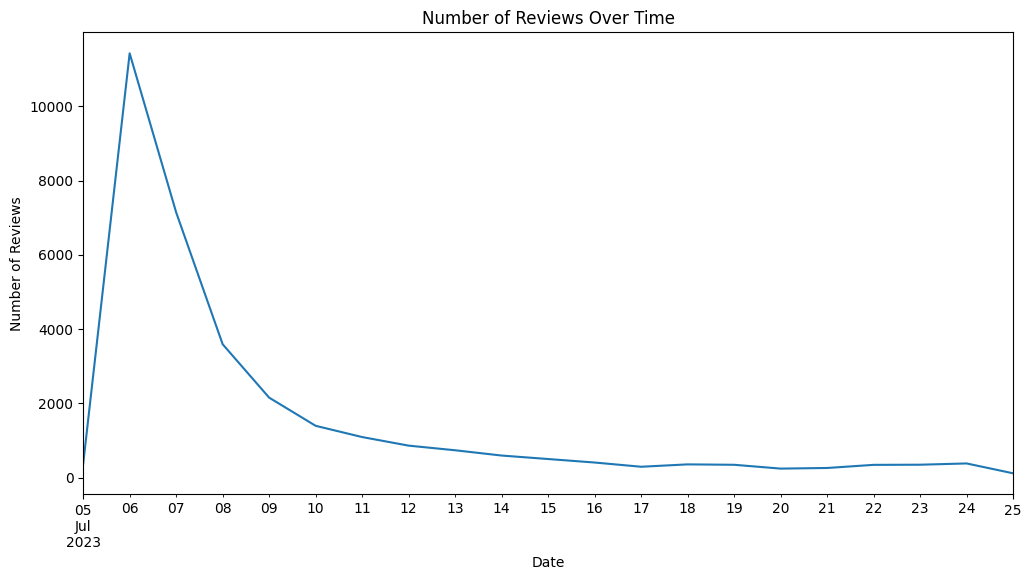

In [8]:
# Convert review_date column to datetime format
eda_df['review_date'] = pd.to_datetime(eda_df['review_date'])

# Set the review_date as the index
eda_df.set_index('review_date', inplace=True)

# Resample the data by day and count the number of reviews
reviews_per_day = eda_df.resample('D').size()

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
reviews_per_day.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

In [36]:
# reviews_per_day.to_csv('../threads_reviews/results/reviews_per_day.csv')

The line graph depicts the number of reviews over time. We can see that there are some peaks, which might correspond to particular events such as app updates, marketing campaigns, or other external factors.      

## Number of reviews per source.

To help understand from which platforms we are receiving most of the feedback.

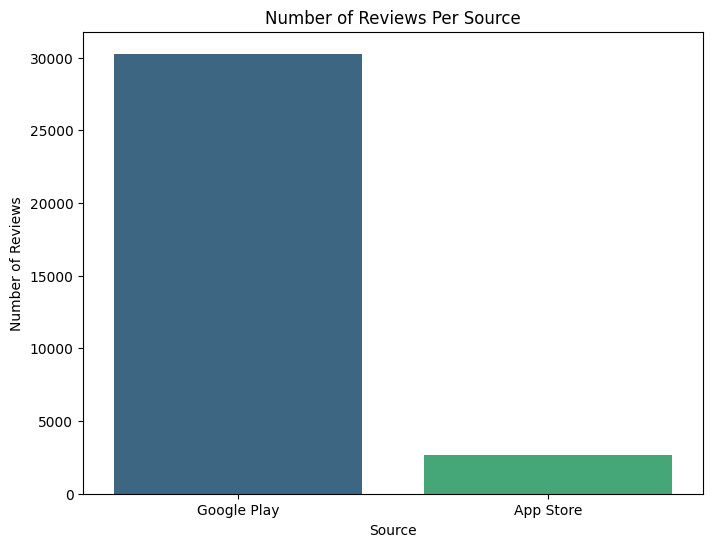

In [9]:
# Reset the index
eda_df.reset_index(inplace=True)

# Count the number of reviews per source
reviews_per_source = eda_df['source'].value_counts()

# Plot the number of reviews per source
plt.figure(figsize=(8, 6))
sns.barplot(x=reviews_per_source.index, y=reviews_per_source.values, palette='viridis')
plt.title('Number of Reviews Per Source')
plt.xlabel('Source')
plt.ylabel('Number of Reviews')
plt.show()


Google Play is the dominant source of reviews, with significantly more reviews than the other platform.

## Most Common Words in Review

In [10]:
# Define positive and negative reviews
positive_reviews = eda_df[eda_df['rating'] >= 4]
negative_reviews = eda_df[eda_df['rating'] <= 2]

# Top 5 common review descriptions for positive reviews
top_positive_review_descriptions = positive_reviews['review_description'].value_counts().head(5)

# Top 5 common review descriptions for negative reviews
top_negative_review_descriptions = negative_reviews['review_description'].value_counts().head(5)

top_positive_review_descriptions, top_negative_review_descriptions

(review_description
 Good        751
 Nice        461
 Nice app    202
 Good app    182
 Best        113
 Name: count, dtype: int64,
 review_description
 Bad          58
 Useless      39
 Worst app    37
 Very bad     28
 Good         27
 Name: count, dtype: int64)

The top 5 most common review descriptions for positive reviews (ratings 4 and 5) are:       

"Good" - appearing 751 times.       
"Nice" - appearing 461 times.       
"Nice app" - appearing 202 times.       
"Good app" - appearing 182 times.       
"Best" - appearing 113 times.       

The top 5 most common review descriptions for negative reviews (ratings 1 and 2) are:       
"Bad" - appearing 58 times.     
"Useless" - appearing 39 times.     
"Worst app" - appearing 37 times.       
"Very bad" - appearing 28 times.        
"Good" - appearing 27 times.        

Interesting to note that the word "Good" appears in both positive and negative reviews. This could be due to users using the word "Good" sarcastically or in phrases that express negative sentiment, such as "Not good".       

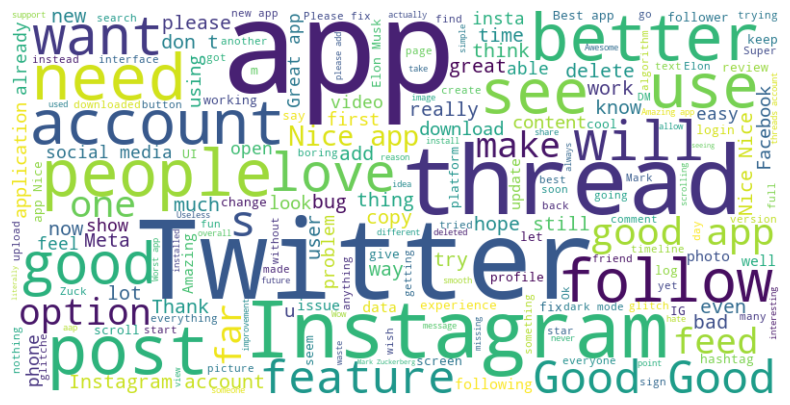

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one large string
all_reviews = ' '.join(eda_df['review_description'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Sentiment Analysis

## Distribution of reviews for each positive negative and neutral reviews

Positive: Rating of 4 or 5      
Negative: Rating of 1 or 2      
Neutral: Rating of 3        

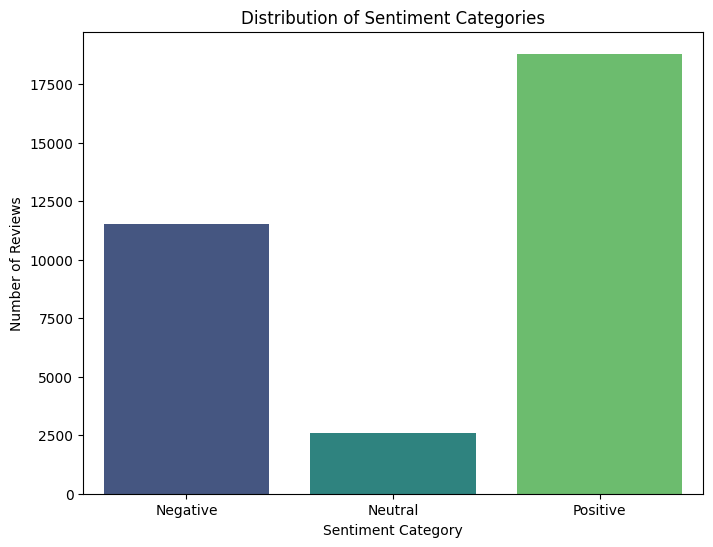

In [12]:
# Define the sentiment categories
eda_df['sentiment'] = pd.cut(eda_df['rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of reviews per sentiment category
reviews_per_sentiment = eda_df['sentiment'].value_counts()

# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.barplot(x=reviews_per_sentiment.index, y=reviews_per_sentiment.values, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

In [34]:
# reviews_per_sentiment.to_csv('../threads_reviews/results/reviews_per_sentiment.csv')

It is clear that positive reviews (ratings 4 and 5) are the most common, followed by negative reviews (ratings 1 and 2). Neutral reviews (rating 3) are the least common.       

This suggests that users tend to express strong sentiments (either positive or negative) about the app rather than a neutral sentiment.     

## Relationship between the length of a review and the rating given

In [13]:
# Calculate the length of each review
eda_df['review_length'] = eda_df['review_description'].apply(lambda review: len(review.split()))

# Calculate the correlation between review_length and rating
correlation = eda_df[['review_length', 'rating']].corr()

correlation

,review_length,rating
review_length,1.000000,-0.208575
rating,-0.208575,1.000000


The correlation between review length and rating is approximately -0.21. This negative value indicates that there's a slight inverse relationship between review length and rating: longer reviews tend to have lower ratings.      

However, it's important to note that this is a weak correlation. Therefore, while there's a trend for longer reviews to be associated with lower ratings, it's not a strong or definitive relationship.     

# Topic Modelling

Using Latent Dirichlet Allocation (LDA) approach

Identify common topics that come up in the reviews. For example, are users commonly discussing certain features or aspects of the product? This could be done using techniques like Latent Dirichlet Allocation (LDA).


LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. It's a popular choice due to its simplicity and good performance on many tasks.          

involves:

Tokenization: Splitting the text into sentences and the sentences into words. Lowercase the words and remove punctuation.       
Removing all stopwords: These are common words that carry less important meaning and are often removed from texts.      
Lemmatization: This step reduces words to their root form.      
Stemming: This reduces related words to a common stem.      

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim import corpora
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
proc_df = df.copy()

In [16]:
# Define the number of topics
num_topics = 5

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess the text
def preprocess(text):
    # Tokenize and remove punctuation
    tokens = word_tokenize(text.lower())
    tokens = [''.join(c for c in w if c not in string.punctuation) for w in tokens]
    tokens = [word for word in tokens if word]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess the reviews
proc_df['processed_reviews'] = proc_df['review_description'].apply(preprocess)

# Create a dictionary from the data
dictionary = corpora.Dictionary(proc_df['processed_reviews'])

# Create a corpus for the LDA model
corpus = [dictionary.doc2bow(text) for text in proc_df['processed_reviews']]

# Create the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get the top words in each topic
topics = ldamodel.print_topics(num_words=5)
print(topics)


[(0, '0.100*"app" + 0.093*"good" + 0.088*"twitter" + 0.058*"nice" + 0.036*"better"'), (1, '0.046*"app" + 0.022*"super" + 0.015*"worst" + 0.012*"nt" + 0.012*"bug"'), (2, '0.059*"twitter" + 0.009*"ok" + 0.009*"timeline" + 0.009*"care" + 0.008*"useless"'), (3, '0.032*"bad" + 0.021*"hai" + 0.016*"first" + 0.013*"review" + 0.009*"app"'), (4, '0.060*"’" + 0.032*"app" + 0.025*"thread" + 0.022*"instagram" + 0.018*"like"')]


In [17]:
lda_df = proc_df.copy()

In [18]:
lda_df

,source,review_description,rating,review_date,processed_reviews
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,"[meh, greatest, experience, chromebook, seems,..."
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,"[pretty, good, first, launch, easy, use, selfe..."
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,"[brand, new, app, well, optimized, however, mi..."
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,"[great, app, lot, potential, however, lot, nee..."
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,"[app, good, need, lot, functionality, example,..."
...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,"[killed, dog, mark, zuckerburg, strangled, dog..."
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,"[add, search, hashtag, like, twitter]"
32907,App Store,bad twister,1,2023-07-17 06:39:13,"[bad, twister]"
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,"[yet, another, trash, meta]"


In [19]:
import gensim
from gensim.corpora import Dictionary

# Preprocess your data
lda_df['processed_reviews'] = lda_df['review_description'].apply(preprocess)

# Create a dictionary representation of the documents
dictionary = Dictionary(lda_df['processed_reviews'])

# Create a bag of words representation of the entire corpus
corpus = [dictionary.doc2bow(doc) for doc in lda_df['processed_reviews']]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print the topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


(0, '0.058*"follow" + 0.053*"people" + 0.040*"post" + 0.037*"feed" + 0.034*"see" + 0.017*"following" + 0.014*"need" + 0.014*"add" + 0.013*"like" + 0.013*"search"')
(1, '0.099*"’" + 0.038*"app" + 0.035*"instagram" + 0.032*"thread" + 0.028*"account" + 0.017*"like" + 0.013*"want" + 0.009*"delete" + 0.009*"see" + 0.009*"get"')
(2, '0.141*"twitter" + 0.074*"better" + 0.060*"app" + 0.059*"love" + 0.042*"like" + 0.031*"amazing" + 0.029*"cool" + 0.023*"application" + 0.016*"wow" + 0.015*"much"')
(3, '0.066*"app" + 0.042*"best" + 0.037*"twitter" + 0.033*"social" + 0.029*"medium" + 0.025*"new" + 0.017*"na" + 0.017*"experience" + 0.017*"star" + 0.014*"boring"')
(4, '0.062*"app" + 0.040*"nt" + 0.032*"post" + 0.023*"ca" + 0.020*"try" + 0.020*"time" + 0.015*"worst" + 0.015*"bug" + 0.014*"crash" + 0.014*"comment"')
(5, '0.302*"good" + 0.079*"app" + 0.049*"👍" + 0.038*"first" + 0.028*"review" + 0.011*"far" + 0.010*"ka" + 0.009*"ki" + 0.009*"job" + 0.008*"crazy"')
(6, '0.050*"awesome" + 0.047*"ok" + 0.0

In [20]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into a single string for each document
lda_df['processed_reviews'] = lda_df['processed_reviews'].apply(' '.join)

# Vectorize your documents into a document-term matrix
vectorizer = TfidfVectorizer(max_features=1000, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(lda_df['processed_reviews'])

# Fit the NMF model
nmf_model = NMF(n_components=10, random_state=1)
nmf_model.fit(dtm)

# Print the topics
for idx, topic in enumerate(nmf_model.components_):
    print("Topic #%d:" % idx)
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]])

Topic #0:
['good', 'far', 'application', 'experience', 'apps', 'job', 'aap', 'really', 'pretty', 'feature']
Topic #1:
['nice', 'application', 'aap', 'experience', 'apps', 'wow', 'work', 'really', 'ui', 'platform']
Topic #2:
['twitter', 'copy', 'like', 'thread', 'paste', 'cheap', 'alternative', 'version', 'clone', 'new']
Topic #3:
['app', 'bad', 'worst', 'cool', 'awesome', 'super', 'like', 'use', 'new', 'excellent']
Topic #4:
['best', 'application', 'social', 'experience', 'apps', 'platform', 'medium', 'thread', 'aap', 'far']
Topic #5:
['instagram', 'nt', 'thread', 'account', 'like', 'ca', 'use', 'follow', 'delete', 'post']
Topic #6:
['great', 'experience', 'far', 'feature', 'start', 'application', 'alternative', 'job', 'need', 'really']
Topic #7:
['better', 'twitter', 'far', 'way', 'elon', 'experience', 'musk', 'think', 'tweeter', 'make']
Topic #8:
['love', 'thread', 'far', 'really', 'mark', 'elon', 'musk', 'super', 'wow', 'meta']
Topic #9:
['amazing', 'wow', 'experience', 'application

In [21]:
from textblob import TextBlob

# Perform sentiment analysis on the reviews
lda_df['sentiment_score'] = lda_df['review_description'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Define sentiment categories based on the sentiment score
lda_df['sentiment_category'] = pd.cut(lda_df['sentiment_score'], bins=3, labels=['Negative', 'Neutral', 'Positive'])

# Preprocess the reviews
lda_df['processed_reviews'] = lda_df['review_description'].apply(preprocess)

# Create a dictionary from the data
dictionary = corpora.Dictionary(lda_df['processed_reviews'])

# Create the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# For each sentiment category
for sentiment in ['Negative', 'Neutral', 'Positive']:
    # Filter reviews for the current sentiment category
    sentiment_reviews = lda_df[lda_df['sentiment_category'] == sentiment]
    
    # Create a corpus for the LDA model
    corpus = [dictionary.doc2bow(text) for text in sentiment_reviews['processed_reviews']]

    # Update the LDA model
    ldamodel.update(corpus)

    # Get the top words in each topic
    topics = ldamodel.print_topics(num_words=5)
    
    print(f"Top topics in {sentiment} reviews:")
    print(topics)
    print("\n")


Top topics in Negative reviews:
[(0, '0.101*"twitter" + 0.064*"application" + 0.044*"elon" + 0.025*"musk" + 0.025*"aap"'), (1, '0.135*"bad" + 0.116*"app" + 0.085*"worst" + 0.052*"useless" + 0.046*"boring"'), (2, '0.041*"app" + 0.034*"nt" + 0.028*"instagram" + 0.024*"account" + 0.021*"thread"'), (3, '0.029*"fake" + 0.020*"mark" + 0.018*"mere" + 0.015*"android" + 0.014*"zuckerberg"'), (4, '0.125*"good" + 0.050*"app" + 0.036*"awful" + 0.023*"disgusting" + 0.022*"ui"')]


Top topics in Neutral reviews:
[(0, '0.104*"twitter" + 0.033*"better" + 0.032*"elon" + 0.021*"musk" + 0.015*"zuck"'), (1, '0.059*"app" + 0.053*"twitter" + 0.044*"copy" + 0.026*"hai" + 0.013*"bad"'), (2, '0.044*"’" + 0.033*"app" + 0.021*"thread" + 0.021*"instagram" + 0.018*"account"'), (3, '0.020*"mark" + 0.009*"zuckerberg" + 0.007*"clone" + 0.007*"working" + 0.007*"❤️"'), (4, '0.041*"app" + 0.039*"like" + 0.028*"feature" + 0.023*"good" + 0.021*"social"')]


Top topics in Positive reviews:
[(0, '0.222*"twitter" + 0.169*"be

In [22]:
lda_df

,source,review_description,rating,review_date,processed_reviews,sentiment_score,sentiment_category
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,"[meh, greatest, experience, chromebook, seems,...",0.092187,Neutral
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,"[pretty, good, first, launch, easy, use, selfe...",0.282205,Neutral
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,"[brand, new, app, well, optimized, however, mi...",0.153438,Neutral
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,"[great, app, lot, potential, however, lot, nee...",0.128571,Neutral
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,"[app, good, need, lot, functionality, example,...",0.313333,Neutral
...,...,...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,"[killed, dog, mark, zuckerburg, strangled, dog...",-0.200000,Neutral
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,"[add, search, hashtag, like, twitter]",0.000000,Neutral
32907,App Store,bad twister,1,2023-07-17 06:39:13,"[bad, twister]",-0.700000,Negative
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,"[yet, another, trash, meta]",0.000000,Neutral


# How sentiment and topics have changed over time

Time Series Analysis

In [23]:
# Convert timestamps to datetime objects and set them as the DataFrame index
lda_df['review_date'] = pd.to_datetime(lda_df['review_date'])
lda_df.set_index('review_date', inplace=True)

# Resample the DataFrame to aggregate reviews by week
daily_lda_df = lda_df.resample('D')['review_description'].agg(sum)

# Create a new DataFrame to store the topics and sentiment scores for each week
daily_topics_sentiments = pd.DataFrame(index=daily_lda_df.index)

# Perform topic modeling and sentiment analysis for each week
for day in daily_lda_df.index:
    # Get the reviews for this week
    daily_reviews = daily_lda_df.loc[day]
    
    # Perform preprocessing
    processed_reviews = preprocess(daily_reviews)
    
    # Create a dictionary and corpus for the LDA model
    dictionary = corpora.Dictionary([processed_reviews])
    corpus = [dictionary.doc2bow(text) for text in [processed_reviews]]
    
    # Create the LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
    
    # Get the top topic for this week
    topics = ldamodel.print_topics(num_words=5)
    daily_topics_sentiments.loc[day, 'top_topic'] = topics[0][1]
    
    # Calculate the sentiment score for this week
    sentiment_score = TextBlob(daily_reviews).sentiment.polarity
    daily_topics_sentiments.loc[day, 'sentiment_score'] = sentiment_score

# Print the weekly topics and sentiment scores
print(daily_topics_sentiments)
# daily_topics_sentiments.to_csv('../threads_reviews/results/daily_topic_sentiments.csv')


                                                     top_topic  \
review_date                                                      
2023-07-05   0.001*"app" + 0.001*"twitter" + 0.001*"instagr...   
2023-07-06   0.000*"app" + 0.000*"thread" + 0.000*"twitter"...   
2023-07-07   0.000*"app" + 0.000*"nt" + 0.000*"instagram" +...   
2023-07-08   0.000*"app" + 0.000*"nt" + 0.000*"twitter" + 0...   
2023-07-09   0.000*"app" + 0.000*"twitter" + 0.000*"nt" + 0...   
2023-07-10   0.000*"app" + 0.000*"nt" + 0.000*"thread" + 0....   
2023-07-11   0.001*"app" + 0.000*"nt" + 0.000*"instagram" +...   
2023-07-12   0.031*"app" + 0.016*"thread" + 0.016*"nt" + 0....   
2023-07-13   0.029*"app" + 0.017*"twitter" + 0.017*"’" + 0....   
2023-07-14   0.001*"app" + 0.001*"nt" + 0.001*"twitter" + 0...   
2023-07-15   0.001*"app" + 0.001*"’" + 0.001*"twitter" + 0....   
2023-07-16   0.001*"app" + 0.001*"nt" + 0.001*"’" + 0.001*"...   
2023-07-17   0.001*"app" + 0.001*"post" + 0.001*"twitter" +...   
2023-07-18

In [24]:
daily_topics_sentiments

,top_topic,sentiment_score
review_date,,
2023-07-05,"0.001*""app"" + 0.001*""twitter"" + 0.001*""instagr...",0.263607
2023-07-06,"0.000*""app"" + 0.000*""thread"" + 0.000*""twitter""...",0.218779
2023-07-07,"0.000*""app"" + 0.000*""nt"" + 0.000*""instagram"" +...",0.175939
2023-07-08,"0.000*""app"" + 0.000*""nt"" + 0.000*""twitter"" + 0...",0.133609
2023-07-09,"0.000*""app"" + 0.000*""twitter"" + 0.000*""nt"" + 0...",0.136703
2023-07-10,"0.000*""app"" + 0.000*""nt"" + 0.000*""thread"" + 0....",0.136836
2023-07-11,"0.001*""app"" + 0.000*""nt"" + 0.000*""instagram"" +...",0.141796
2023-07-12,"0.031*""app"" + 0.016*""thread"" + 0.016*""nt"" + 0....",0.132082
2023-07-13,"0.029*""app"" + 0.017*""twitter"" + 0.017*""’"" + 0....",0.119167


In [29]:
daily_topics_sentiments = daily_topics_sentiments.reset_index()
daily_topics_sentiments

,review_date,top_topic,sentiment_score
0,2023-07-05,"0.001*""app"" + 0.001*""twitter"" + 0.001*""instagr...",0.263607
1,2023-07-06,"0.000*""app"" + 0.000*""thread"" + 0.000*""twitter""...",0.218779
2,2023-07-07,"0.000*""app"" + 0.000*""nt"" + 0.000*""instagram"" +...",0.175939
3,2023-07-08,"0.000*""app"" + 0.000*""nt"" + 0.000*""twitter"" + 0...",0.133609
4,2023-07-09,"0.000*""app"" + 0.000*""twitter"" + 0.000*""nt"" + 0...",0.136703
5,2023-07-10,"0.000*""app"" + 0.000*""nt"" + 0.000*""thread"" + 0....",0.136836
6,2023-07-11,"0.001*""app"" + 0.000*""nt"" + 0.000*""instagram"" +...",0.141796
7,2023-07-12,"0.031*""app"" + 0.016*""thread"" + 0.016*""nt"" + 0....",0.132082
8,2023-07-13,"0.029*""app"" + 0.017*""twitter"" + 0.017*""’"" + 0....",0.119167
9,2023-07-14,"0.001*""app"" + 0.001*""nt"" + 0.001*""twitter"" + 0...",0.130463


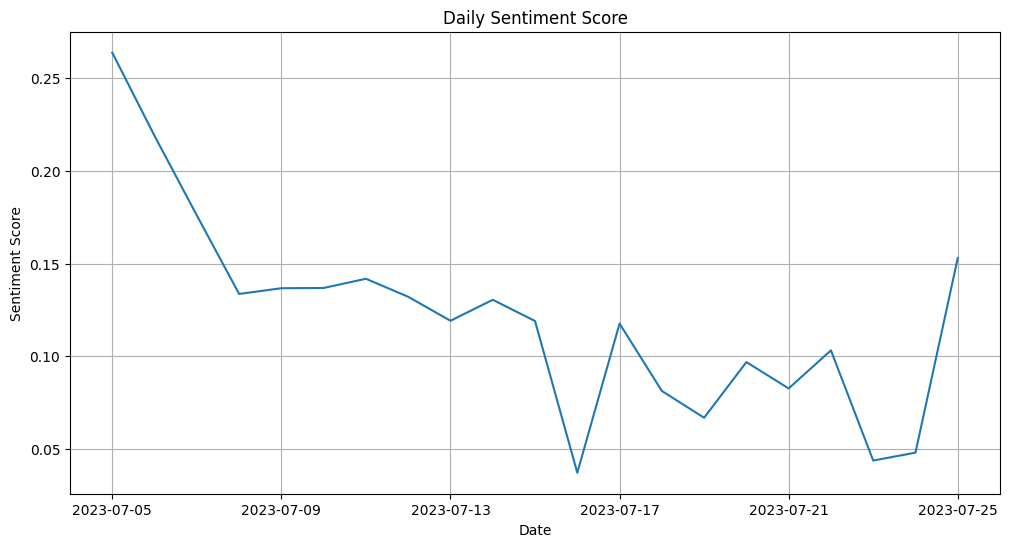

In [33]:
# Read the data
daily_sentiment_df = pd.read_csv('../threads_reviews/results/daily_topic_sentiments.csv')

# Convert 'review_date' to datetime format
daily_sentiment_df['review_date'] = pd.to_datetime(daily_sentiment_df['review_date'])

# Set 'review_date' as the index of the dataframe
daily_sentiment_df.set_index('review_date', inplace=True)

# Plot sentiment scores over time
plt.figure(figsize=(12,6))
plt.plot(daily_sentiment_df['sentiment_score'])
plt.title('Daily Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()
